# Data Cleaning

In [1]:
#import all the packages and libraries
import numpy as np
import pandas as pd
#import language processing toolkit
import nltk
from nltk.tokenize import word_tokenize
import re
import html
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.moses import MosesDetokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#import the training and testing data package
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from collections import Counter

In [2]:
#in order to remove all the stopwords, remove twice, the first time remove all stopwords in the stopwords file
#then that in local library
#therefore, first read all the stopwords in the given file
stoplist = []
with open('stop_words.txt', 'r', encoding = 'utf-8') as file:
    for line in file:
        each_line = line.split('\n')
        line_join = ''.join(each_line)
        stoplist.append(line_join)

In [3]:
#next load the stopwords in local lib
stop_words = set(stopwords.words('english'))

In [4]:
def filter_words(tweets): #define a function to remove the stopwords twice
    token = RegexpTokenizer(r'\w+')
    word = token.tokenize(tweets)
    final_tw1 = [w for w in word if not w in stop_words]
    final_tw2 = [w for w in final_tw1 if not w in stoplist]
    final_tw3 = [w for w in final_tw2 if w.isalpha()]
    return final_tw3

### 1. generic tweets

In [5]:
tweets= pd.read_csv('generic_tweets.txt') #open the whole text file into a dataframe, this is the classified data
generic_tw=tweets.iloc[:]['text'] #read the data into a list
#start cleaning
#cleaning No.4: change all the text to lower case
gtw = [w.lower() for w in generic_tw]

#cleaning No.3 remove all the url links
results=[]
for i in gtw:
    result = re.sub(r'http\S+', '', i)
    results.append(result)
gtw=results

#cleaning No.1: remove all the tags
nontag=[]
for i in gtw:
    tags = re.compile('/<[^>]+>/')
    nontags = re.sub(tags,'', i)
    nontag.append(nontags)
gtw=nontag

#cleaning No.2: replace all the html character codes
gtws=[]
for j in gtw:
    gtw_corr = html.unescape(j)
    gtws.append(gtw_corr)
gtw=gtws

#cleaning No.5: get rid of all the stopwords
final_list=[] #set each tweet to a single list
for i in range(len(gtw)):
    filtered_words = filter_words(gtw[i])
    final_list.append(filtered_words)

#combine all the tockenized words in each tweets back to sentences
detokenizer = MosesDetokenizer()
combine=[]
for line in final_list:
    combined = detokenizer.detokenize(line, return_str=True)
    combine.append(combined)
final_gtw = combine

#give the cleaned tweets to the colume in the original dataframe
tweets.iloc[:]["text"] = final_gtw
tweets.head()

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot awww bummer shoulda david carr thir...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset update facebook texting cry result schoo...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dived times ball managed save rest bo...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,body feels itchy fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass behaving mad


### 2. US airline tweets

In [6]:
#same method and procedure to clean the US ariline tweets and assignment it to the original US dataframe
#this is the unclassified data
tw= pd.read_csv('US_airline_tweets.csv')
US_tw=tw.iloc[:]['text']

UStw = [w.lower() for w in US_tw]

USresults=[]
for i in UStw:
    result = re.sub(r'http\S+', '', i)
    USresults.append(result)
UStw=USresults

nontag=[]
for i in UStw:
    tags = re.compile('/<[^>]+>/')
    nontags = re.sub(tags,'', i)
    nontag.append(nontags)
UStw=nontag

UStws=[]
for j in UStw:
    UStw_corr = html.unescape(j)
    UStws.append(UStw_corr)
UStw=UStws

finalUS_list=[]
for i in range(len(UStw)):
    filtered_words = filter_words(UStw[i])
    finalUS_list.append(filtered_words)
    
combine = []
for line in finalUS_list: #combine single word together
    combined = detokenizer.detokenize(line, return_str=True)
    combine.append(combined)
finalUS_tw = combine

tw[["text"]]=finalUS_tw
tw_new = tw
tw_new.head()

,id,sentiment,negative_reason,user,retweet_count,text
0,5.703010e+17,positive,NaN,jnardino,0,virginamerica commercials experience tacky
1,5.703010e+17,negative,Bad Flight,jnardino,0,virginamerica aggressive blast obnoxious enter...
2,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica big bad thing
3,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica seriously pay flight seats playi...
4,5.703010e+17,positive,NaN,cjmcginnis,0,virginamerica time fly vx â œear wormâ wonâ


# Exploratory analysis

### 1. generic tweets

In [7]:
positive = len(tweets[tweets.iloc[:]["class"] == 4])
negative = len(tweets[tweets.iloc[:]["class"] == 0])
print(positive,negative)
#we can see that the number of negative and positive tweets are identical

100000 100000


In [8]:
#search the tweets about flight or airlines in generic tweets
#keywords - airline, fly, flight
#six airline companies (virgin america, united, southwest air, jet blue, us airways, american air)
keywords = ['virgin america', 'virginamerica', 'united','unitedair', 'southwest', 'southwest airlines'
            'jet blue', 'jetblue','us airways', 'usairways', 'american air', 'american airlines',
            'airline', 'fly', 'flight', 'flying']

In [9]:
related = [] #select all related tweets from all the generic cleaned tweets
for line in final_gtw: #final_gtw is the sentenced tweets list
    token=line.split(' ')
    for words in token:
        if words in keywords:
            related.append(line)

In [10]:
total_number = len(final_gtw)
related_number = len(related)
print(total_number, related_number)

200000 770


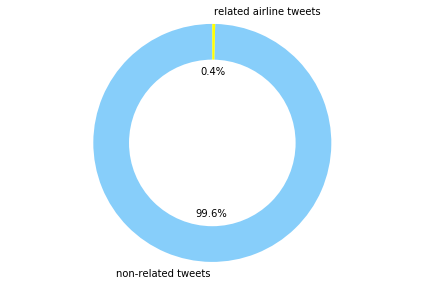

In [11]:
labels = ['non-related tweets', 'related airline tweets']
sizes = [total_number-related_number, related_number]
colors = ['lightskyblue','yellow']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()
#the related tweets are just a little part of all the tweets, so the classified data does not contain very useful information

In [13]:
single_list = [] #set all the tockenized words into a single list
for i in final_list:
    for j in i:
        single_list.append(j)

In [14]:
word_list = single_list #search 1500 the toppest common words
word_counter = {}
for word in word_list:
    if word in word_counter:
        word_counter[word] += 1
    else:
        word_counter[word] = 1
            
popular_words = sorted(word_counter, key = word_counter.get, reverse = True)

top_1500 = popular_words[:1500]

In [15]:
top1500_string = ' '.join(top_1500) #meantile change the list into a string

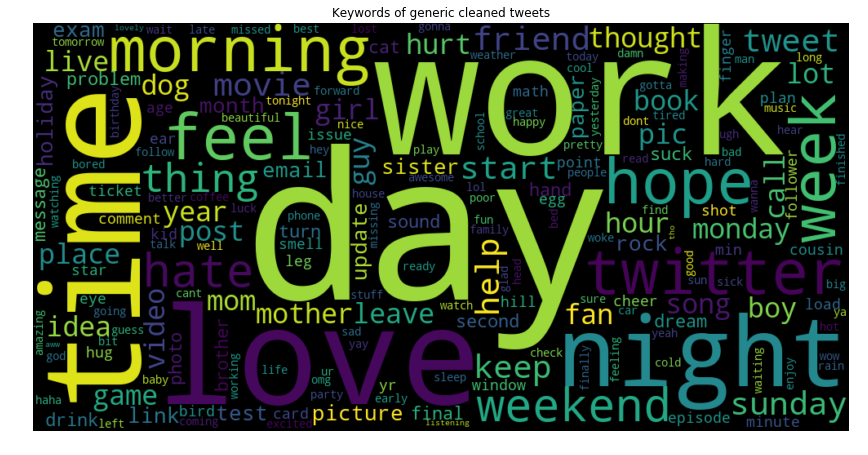

In [16]:
wordcloud1 = WordCloud(width = 1000, height = 500).generate(top1500_string)
plt.figure(figsize=(15,7.5))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title('Keywords of generic cleaned tweets')
plt.axis('off')
plt.show()

### 2. US airline tweets

In [17]:
#since all the tweets are in lower case now, we just need to search the lower case keywords
#create a list including all the companies name in order to search
airline_companies = ['virginamerica','united','southwestair','jetblue','usairways','americanair']

In [18]:
def sort_words(tweets):
    words  =[w for w in tweets if w in airline_companies]
    return words

In [19]:
sorted_list=[] #the list of each word remaining the airline companies name
for i in range(len(finalUS_list)):
    sorted_words = sort_words(finalUS_list[i])
    sorted_list.append(''.join(sorted_words[:1]))
#because there are some tweets including two airlines, we just keep the first one

In [20]:
airline_column = pd.Series(sorted_list)
tw_new['airline companies'] = airline_column.values
tw_new.head()

,id,sentiment,negative_reason,user,retweet_count,text,airline companies
0,5.703010e+17,positive,NaN,jnardino,0,virginamerica commercials experience tacky,virginamerica
1,5.703010e+17,negative,Bad Flight,jnardino,0,virginamerica aggressive blast obnoxious enter...,virginamerica
2,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica big bad thing,virginamerica
3,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica seriously pay flight seats playi...,virginamerica
4,5.703010e+17,positive,NaN,cjmcginnis,0,virginamerica time fly vx â œear wormâ wonâ,virginamerica


In [21]:
df1 = tw_new[['sentiment','airline companies']].groupby(['airline companies']).agg(['count'])
df1

,sentiment
,count
airline companies,
,4
americanair,2296
jetblue,1496
southwestair,1757
united,3123
usairways,2532
virginamerica,333


In [22]:
#we can see there are 4 extra tweets that contains no airline and the total tweets about each airline company are defined above
#now do the distribution of all the airline companies first
american_air = df1.iloc[1][0] #select corresponding values
jet_blue = df1.iloc[2][0]
southwest_air = df1.iloc[3][0]
united = df1.iloc[4][0]
us_airways = df1.iloc[5][0]
virgin_america = df1.iloc[6][0]

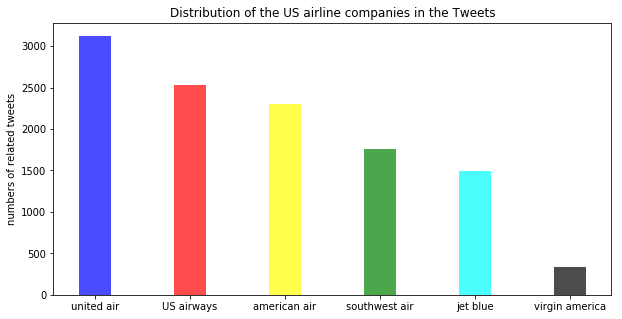

In [23]:
y = [united, us_airways,american_air, southwest_air, jet_blue, virgin_america] #descending
N = len(y)
x = range(N)
width = 1/3
plt.figure(figsize=(10,5)) #magnify the plot
opacity = 0.7 #set the transparency
plt.bar(x, y, width, color=['blue','red','yellow','green','cyan','black'], alpha = opacity)
axis = ['united air', 'US airways', 'american air', 'southwest air', 'jet blue', 'virgin america']
plt.xticks(x, axis)
plt.ylabel('numbers of related tweets')
plt.title('Distribution of the US airline companies in the Tweets')
plt.show()

In [24]:
#we can count the positive/negative tweents of each airline companies
df2 = tw_new[['id','sentiment','airline companies']].groupby(['sentiment','airline companies']).agg(['count'])
df2

id
                            count
sentiment airline companies      
negative                        3
          americanair        1960
          jetblue             953
          southwestair       1187
          united             2631
          usairways          2263
          virginamerica       181
positive                        1
          americanair         336
          jetblue             543
          southwestair        570
          united              492
          usairways           269
          virginamerica       152

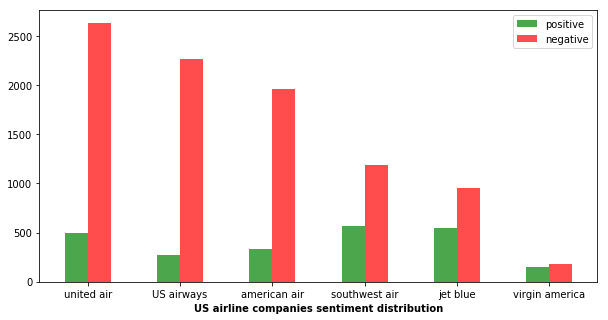

In [25]:
#now show the grouped data into grouped bar chart
#set width of bar
barWidth = 0.25
 
#set height of bar
bars1 = [492, 269, 336, 570, 543, 152] #positive
bars2 = [2631, 2263, 1960, 1187, 953, 181] #negative
 
#set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
#make the plot
plt.figure(figsize=(10,5))
plt.bar(r1, bars1, color='g', width=barWidth, label='positive',alpha = opacity)
plt.bar(r2, bars2, color='r', width=barWidth, label='negative',alpha = opacity)

 
#add xticks on the middle of the group bars
plt.xlabel('US airline companies sentiment distribution', fontweight='bold')
plt.xticks([r + 0.5*barWidth for r in range(len(bars1))], ['united air','US airways','american air','southwest air','jet blue','virgin america'])
 
#create legend & Show graphic
plt.legend()
plt.show()

In [26]:
#now print the positive rate for each airline
p_american = df2.iloc[-6][0]/american_air
p_jetblue = df2.iloc[-5][0]/jet_blue
p_southwest = df2.iloc[-4][0]/southwest_air
p_united = df2.iloc[-3][0]/united
p_us = df2.iloc[-2][0]/us_airways
p_virginamerica = df2.iloc[-1][0]/virgin_america
rate = [p_united,p_us,p_american,p_southwest,p_jetblue,p_virginamerica]
rate

[0.15754082612872239,
 0.10624012638230648,
 0.14634146341463414,
 0.32441661923733639,
 0.36296791443850268,
 0.45645645645645644]

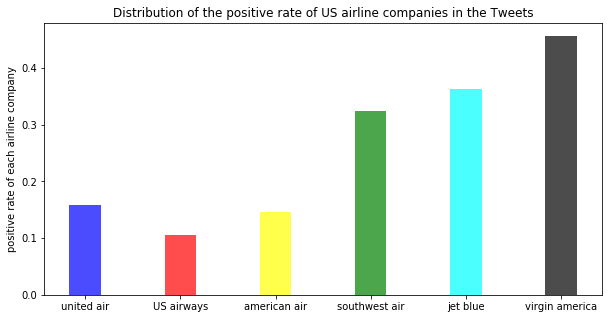

In [27]:
N = len(rate)
x = range(N)
width = 1/3
plt.figure(figsize=(10,5))
plt.bar(x, rate, width, color=['blue','red','yellow','green','cyan','black'], alpha = opacity)
plt.xticks(x, axis)
plt.ylabel('positive rate of each airline company')
plt.title('Distribution of the positive rate of US airline companies in the Tweets')
plt.show()

In [28]:
negative = [] #select all the negative feedback from the dataframe into a list
for line in tw_new[tw_new['sentiment']=='negative']['negative_reason']:
    if line != "Can't Tell": #filter out those customers who do not what to tell the specific reason
        negative.append(line)

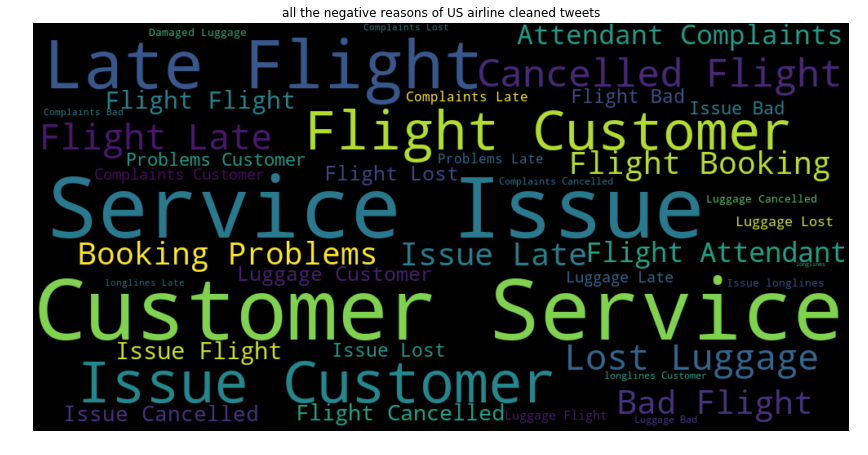

In [29]:
#change this list into a string using the same method
negative_reason = ' '.join(negative)
#create the wordcloud analysing all the negative reasons in all six airline companies
wordcloud2 = WordCloud(width = 1000, height = 500).generate(negative_reason)
plt.figure(figsize=(15,7.5))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.title('all the negative reasons of US airline cleaned tweets')
plt.axis('off')
plt.show()

# Model preparation

### 1. generic tweets

In [30]:
def count_frequency_processor(listname, n):
#this function search the most popular words in a given tweet list and count the word frequency of each word existing in the tweet list
    counter = Counter()
    
    for i in range(len(listname)):
        #return all non-overlapping matches of pattern in string, as a list of strings
        counter.update([word for word in re.findall(r'\w+', listname[i])])
        if (i % 100000 == 0):
                print("processed %d tweet" % (i+1))
    
    #select most frequent n features            
    topn = counter.most_common(n) 
    
    np_array= []
    
    for i in range(len(listname)):
            sentiCounter = Counter([word for word in re.findall(r'\w+', listname[i])]) 
            
            #if the word appears in the tweet list, then count the frequency, else 0
            topnintweet = [sentiCounter[word] if sentiCounter[word] > 0 else 0 for (word, wordCount) in topn]
            
            #create a list for top n words with encoded target(sentiment) at the end
            np_array.append(topnintweet + [tweets.iloc[:,0][i]])
            if (i % 100000 == 0):
                print("processed %d tweet" % (i+1))
                
    feature_df = pd.DataFrame(np_array)
    dfName = []
    for c in topn:
        dfName.append(c[0])
    feature_df.columns = dfName + ['target']
    #this new column will be the same as the first column of the dataframe, which is same as the column 'class'
    
    print("Finish!")
    
    return feature_df

In [31]:
count_frequency = count_frequency_processor(final_gtw, 1000)

processed 1 tweet
processed 100001 tweet
processed 1 tweet
processed 100001 tweet
Finish!


In [32]:
count_frequency.head()
#we can see that the popular words are the same as what sorted in question 2 before, so this function works
#And the first tweet correspond to the result from the function - there is a 'day'

,good,day,work,today,going,love,time,lol,night,well,...,buddy,joke,plane,major,updated,congratulations,positive,jonasbrothers,mouth,target
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
x = count_frequency.iloc[:,:-2] #extract x to a dataframe - all the dataset without the final column
y = count_frequency[['target']] #extract y to a dataframe - the final column
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) #split the data to training & testing

### 2. US airline tweets

In [34]:
def frequency_processor(listname, n):

    counter = Counter()
    
    for i in range(len(listname)):
        counter.update([word for word in re.findall(r'\w+', listname[i])]) #if word not in noise_word
        if (i % 20000 == 0):
                print("processed %d tweet" % (i+1))
            
    topn = counter.most_common(n)
    
    np_array= []
    
    for i in range(len(listname)):
            sentiCounter = Counter([word for word in re.findall(r'\w+', listname[i])]) 

            topnintweet = [sentiCounter[word] if sentiCounter[word] > 0 else 0 for (word, wordCount) in topn]

            np_array.append(topnintweet+[tw_new.iloc[:,0][i]])
            if (i % 20000 == 0):
                print("processed %d tweet" % (i+1))
                
    feature_df = pd.DataFrame(np_array)
    dfName = []
    for c in topn:
        dfName.append(c[0])
    feature_df.columns = dfName + ['sentiment']
    
    print('Finish!')
    
    return feature_df

In [35]:
count_USfrequency = frequency_processor(finalUS_tw, 1000)

processed 1 tweet
processed 1 tweet
Finish!


In [36]:
count_USfrequency[['sentiment']]=tw_new[['sentiment']] #change the new column to the sentiment
count_USfrequency.head()

,united,flight,usairways,americanair,southwestair,jetblue,cancelled,service,customer,help,...,quality,pr,tweets,cab,heading,sleeping,domestic,professional,children,sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive


In [37]:
US_airline = count_USfrequency.replace('positive', 4) #change the sentiment to the value - 0 or 4
US_final = US_airline.replace('negative', 0) #because we want to predict the sentiment value (the output variable)
US_final.head()

,united,flight,usairways,americanair,southwestair,jetblue,cancelled,service,customer,help,...,quality,pr,tweets,cab,heading,sleeping,domestic,professional,children,sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [38]:
x_US = US_final.iloc[:,:-2] #extract x to a dataframe
y_US = US_final.sentiment #extract y to a dataframe

# Model implementation

### model one

In [39]:
clf = LogisticRegression(random_state=0).fit(x_train, y_train) #apply logistic regression model to training data
prediction = clf.predict(x_test) #apply the model to test data
accuracy = accuracy_score(y_test, prediction) #find the accuracy
accuracy #the accuracy is fine

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.70968333333333333

### apply model

In [40]:
prediction_US = clf.predict(x_US) #evaluate the same model (clf) on the US airline data
accuracy_US = accuracy_score(y_US, prediction_US)
accuracy_US
#how well do your predictions match the sentiment labelled in the US airline data?
#not very good, just nearly 50% prediction accuracy

0.53218958495797586

### model two

In [41]:
#now the dataframe is just the negative tweets in unclassified data
tw_negative = tw_new[tw_new.sentiment == 'negative'] #extract all the negative tweets
tw_ordered = tw_negative.reset_index() #reset the index to normal
tw_ordered.head()

,index,id,sentiment,negative_reason,user,retweet_count,text,airline companies
0,1,5.703010e+17,negative,Bad Flight,jnardino,0,virginamerica aggressive blast obnoxious enter...,virginamerica
1,2,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica big bad thing,virginamerica
2,3,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica seriously pay flight seats playi...,virginamerica
3,11,5.702820e+17,negative,Late Flight,smartwatermelon,0,virginamerica sfo pdx schedule mia,virginamerica
4,13,5.702770e+17,negative,Bad Flight,heatherovieda,0,virginamerica flew nyc sfo week fully sit seat...,virginamerica


In [42]:
tw_ordered_new = tw_ordered.drop('index', 1) #delete the origin index
tw_ordered_new.head()

,id,sentiment,negative_reason,user,retweet_count,text,airline companies
0,5.703010e+17,negative,Bad Flight,jnardino,0,virginamerica aggressive blast obnoxious enter...,virginamerica
1,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica big bad thing,virginamerica
2,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica seriously pay flight seats playi...,virginamerica
3,5.702820e+17,negative,Late Flight,smartwatermelon,0,virginamerica sfo pdx schedule mia,virginamerica
4,5.702770e+17,negative,Bad Flight,heatherovieda,0,virginamerica flew nyc sfo week fully sit seat...,virginamerica


In [43]:
negative_tweets = [] #select all the negative feedback from the dataframe into a list
for line in tw_negative['text']:
    negative_tweets.append(line)

In [44]:
def processor(listname, n):

    counter = Counter()
    
    for i in range(len(listname)):
        counter.update([word for word in re.findall(r'\w+', listname[i])]) #if word not in noise_word
        if (i % 10000 == 0):
                print("processed %d tweet" % (i+1))
          
    topn = counter.most_common(n)
    
    np_array= []
    
    for i in range(len(listname)):
            sentiCounter = Counter([word for word in re.findall(r'\w+', listname[i])]) 

            topnintweet = [sentiCounter[word] if sentiCounter[word] > 0 else 0 for (word,wordCount) in topn]

            np_array.append(topnintweet + [tw_ordered_new.iloc[:,0][i]])
            if (i % 10000 == 0):
                print("processed %d tweet" % (i+1))
                
    feature_df = pd.DataFrame(np_array)
    dfName = []
    for c in topn:
        dfName.append(c[0])
    feature_df.columns = dfName + ['negative reason']
    
    print('Finish!')
    
    return feature_df

In [45]:
US_negative = processor(negative_tweets, 1000)
US_negative.head()

processed 1 tweet
processed 1 tweet
Finish!


,flight,united,usairways,americanair,southwestair,jetblue,cancelled,service,hours,help,...,prepared,nasty,compassion,sold,apologize,gotta,drove,gear,destinationdragons,negative reason
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.703010e+17
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.703010e+17
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.703010e+17
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.702820e+17
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.702770e+17


In [46]:
US_negative[['negative reason']]=tw_ordered_new.negative_reason #change the final column to corresponding negative reasons
US_negative.head(10) #negative reason is what to be predicted

,flight,united,usairways,americanair,southwestair,jetblue,cancelled,service,hours,help,...,prepared,nasty,compassion,sold,apologize,gotta,drove,gear,destinationdragons,negative reason
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bad Flight
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Can't Tell
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Can't Tell
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Late Flight
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Bad Flight
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Can't Tell
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Customer Service Issue
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Customer Service Issue
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Can't Tell
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bad Flight


In [47]:
x_US_negative = US_negative.iloc[:,:-2]
y_US_negative = US_negative[['negative reason']]
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_US_negative, y_US_negative, test_size=0.3, random_state=42)

In [48]:
y_test2.head() #the index shown is the index extracted in the 

,negative reason
624,longlines
5046,Late Flight
2164,Customer Service Issue
6481,Can't Tell
6788,Can't Tell


In [49]:
y_test2_show = y_test2.reset_index()
y_test2_show = y_test2_show.drop('index', 1)
y_test2_show.head(10) #that are the true reasons what to predict later

,negative reason
0,longlines
1,Late Flight
2,Customer Service Issue
3,Can't Tell
4,Can't Tell
5,Customer Service Issue
6,Customer Service Issue
7,Customer Service Issue
8,Can't Tell
9,Flight Attendant Complaints


In [50]:
clf2 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train2, y_train2)
##multi-class logistic regression model

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
#the accuracy to predict the reason for the negative tweets using the multi-class regression model clf2
prediction_new = clf2.predict(x_test2)
accuracy_negative = accuracy_score(y_test2, prediction_new)
accuracy_negative

0.60639070442992016

In [52]:
df = pd.DataFrame({'predicted': prediction_new}) #will be used in the Discussion
df.head(10)

,predicted
0,Flight Attendant Complaints
1,Lost Luggage
2,Late Flight
3,Lost Luggage
4,Can't Tell
5,Can't Tell
6,Bad Flight
7,Customer Service Issue
8,Flight Booking Problems
9,Flight Attendant Complaints


# Discussion

In [53]:
#now we find tweets related to each company using the keywords
#we need the one word for company and two words together when searching
a = []
for line in gtw:
    if 'united' in line:
        if 'united states' not in line:
            if 'reunited' not in line:
                a.append(line)
a = ["finally a hotel that didn't ding me $$$ for wireless access. kudos to st. regis, aspen. i did just pay $40 to bring my luggage on united",
    '@adampatterson would you recommend united? ',
     'united today  yay. off soon']
#after reading tweets output one by one, there are only two tweets about united airline

In [54]:
b = []
#we use the tweets list before the stopwords filter because the 'US' lowercase 'us' will be filtered out
#that is the reason we use the tweets list output before the stopwords to ensure the accuracy
for line in gtw:
    if 'us airways' in line:
        b.append(line)
    elif 'usairway' in line:
        b.append(line)
b

['why do i fly us airways? i think only 1 in 10 flights are on time ',
 "it's unbelievable how bad us airways customer service is - this woman is amazingly rude to my friend - i would not recommend this airline ",
 'we missed our flight.  late taxi. usairways is not charging us. thank god.']

In [55]:
c = []
for line in gtw:
    if 'american air' in line:
        c.append(line)
    elif 'americanair' in line:
        c.append(line)
c

['@lisaloeb4real i feel as though you have had really bad luck when it comes to american airlines ',
 'yea 4 american airlines for losing my clubs and suitcase. making due w/rental club and new clothes. ',
 '@sspivy  - mileage run!!!  double eqm miles on american airlines ']

In [56]:
d = []
for line in gtw:
    if 'southwest air' in line:
        d.append(line)
    elif 'southwestair' in line:
        d.append(line)
    elif 'southwest flight' in line:
        d.append(line)
d

["@southwestair does this mean you're leaving isp? ",
 "wow @southwestair is so inconvenient for business travel. why can't i checkin online just because my company booked my flight???  got b38",
 'no starbucks in dal airport. meh.  @southwestair',
 '@aliciaharrt yes!  hehe. southwest airlines baby!',
 '@sauce2u i will have enough time for food and drinks in chicago before i jump on a southwest flight home just  there for food and drinks  ']

In [57]:
e = []
for line in gtw:
    if 'jetblue' in line:
        e.append(line)
    elif 'jet blue' in line:
        e.append(line)
e

["in floridaaaaaaaaaa. too bad our tvs didn't work on jet blue! ",
 "jet blue was nice; it wasn't their fault there was massive turbulence and a screaming, kicking toddler sitting next to me. ",
 'there are some nice @jetblue employees on this flight #345 bos to jfk this morning. ',
 'i just did a very creative thing to speed up my experience at jetblue... though my ankle does hurt a little.... ',
 '@jeffzilla t5 is the only thing jetblue has over virgin america. vx has better seats, on board food + entertainment, cuter stewardesses ',
 '@terrencej106 next time you should try to get a jet blue flight.  they have yet to let me down ']

In [58]:
f = []
for line in gtw:
    if 'virgin america' in line:
        f.append(line)
    elif 'virginamerica' in line:
        f.append(line)
f
#but the second tweets output is considered to a positive tweet

['going to spain on tuesday, give @virginamerica outside america ',
 '@jeffzilla t5 is the only thing jetblue has over virgin america. vx has better seats, on board food + entertainment, cuter stewardesses ',
 "cheap flight via @virginamerica and decently priced rooms at the intercontinental with free parking (!). i think i'm ready for wwdc "]

In [59]:
print(len(a),len(b),len(c),len(d),len(e),len(f))

3 3 3 5 6 3


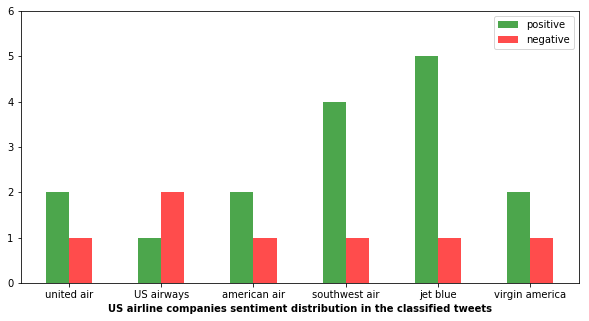

In [60]:
#because there are only a few tweets, we just directly find their sentiment by simply searching
#now show the grouped data into grouped bar chart
#set width of bar
barWidth = 0.25
 
#set height of bar
bars3 = [2, 1, 2, 4, 5, 2] #positive tweets
bars4 = [1, 2, 1, 1, 1, 1] #negative tweets
 
#set position of bar on X axis
r3 = np.arange(len(bars3))
r4 = [x + barWidth for x in r3]

#make the plot
plt.figure(figsize=(10,5))
plt.bar(r3, bars3, color='g', width=barWidth, label='positive',alpha = opacity)
plt.bar(r4, bars4, color='r', width=barWidth, label='negative',alpha = opacity)

 
#add xticks on the middle of the group bars
plt.xlabel('US airline companies sentiment distribution in the classified tweets', fontweight='bold')
plt.xticks([r + 0.5*barWidth for r in range(len(bars3))], ['united air','US airways','american air','southwest air','jet blue','virgin america'])
plt.yticks([0,1,2,3,4,5,6])
#create legend & Show graphic
plt.legend()
plt.show()
#this is the distribution of classified tweets related on airline companies below, and it may be inaccurate
#then we can compare the plot with the distribution of US airline

In terms of the accuracy returned to the first model, which is how well the predictions analysed by the logistic regression model in generic tweets match the sentiment labelled in US airline data. The accuracy score is low, about 53%.

The reason of low accuracy is that there are much more negative sentiment in US airline tweets but there are identical sentiments (half in positive and half in negative) in the generic tweets. The logistic regression model trained by generic tweets fail to predict the US airline tweets because of this inconsistence. This model may predict the positive sentiment well but cannot predict the negative sentiment of good accuracy. As a whole, the accuracy level is low. As mentioned before, there are only 0.4% tweets related to the airline sentiments in classified data (generic tweets), leading to low prediction level. That is another reason the accuracy is low. In conclusion, it is not very accurate using the given generic tweets to predict the sentiments in US airline tweets.

From the second section, sentiment distribution for each US airline company in the 'US_airline tweets' and the satisfaction rate were analysed. It can be found that the public like Virgin America airline more than five airline comanies else with around 45% satisfaction rate. US airways has the least satisfaction with only 10%. 'generic tweets' only has 0.3% tweets related to the airline companies feedback. The sentiment distribution in 'generic_tweets' are analysed above as well. According to two sentiment distributions, the inconsistence exists. In detail, there are much more negative tweets for each airline company in 'US_airline tweets' than positive tweets. However, there are more positive tweets in 'generic_tweets' than negtive tweets, except US airways. In 'generic_tweets' sentiment distribution, jet blue airline has the highest satisfaction rate, while the US airways has the least satisfaction rate. Therefore, no matter in which sentiment distribution, US airways always is the worst. The sample size is much more smaller than the size of generic tweets (classified tweets), that may be a reason to explain the sentiment difference and inconsistence.

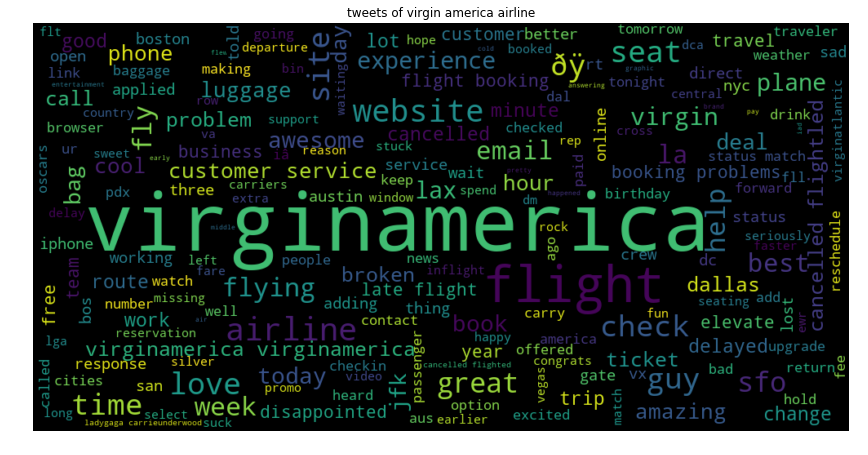

In [61]:
#virgin america wordcloud
virginamerica_df = tw_new[tw_new['airline companies'] == 'virginamerica']
virginamerica_list = virginamerica_df['text']

text = ' '.join(virginamerica_list)
wordcloud3 = WordCloud(width = 1000, height = 500).generate(text)
plt.figure(figsize=(15,7.5))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.title('tweets of virgin america airline')
plt.axis('off')
plt.show()

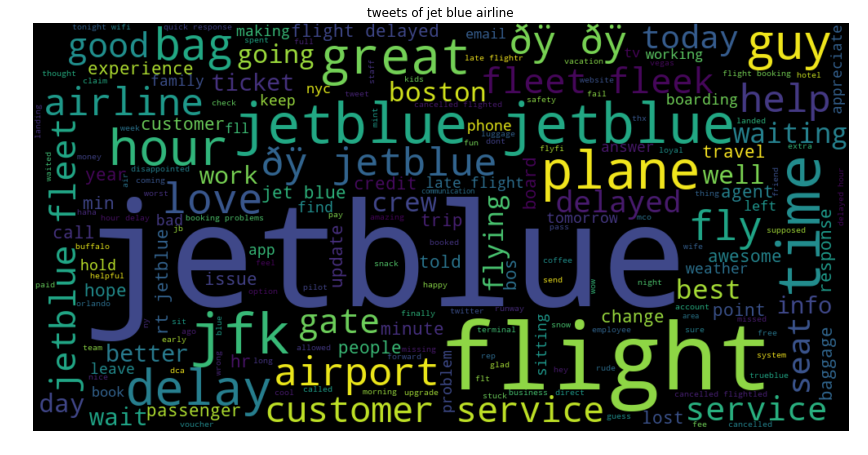

In [62]:
#jet blue wordcloud
jetblue_df = tw_new[tw_new['airline companies'] == 'jetblue']
jetblue_list = jetblue_df['text']

text = ' '.join(jetblue_list)
wordcloud4 = WordCloud(width = 1000, height = 500).generate(text)
plt.figure(figsize=(15,7.5))
plt.imshow(wordcloud4, interpolation='bilinear')
plt.title('tweets of jet blue airline')
plt.axis('off')
plt.show()

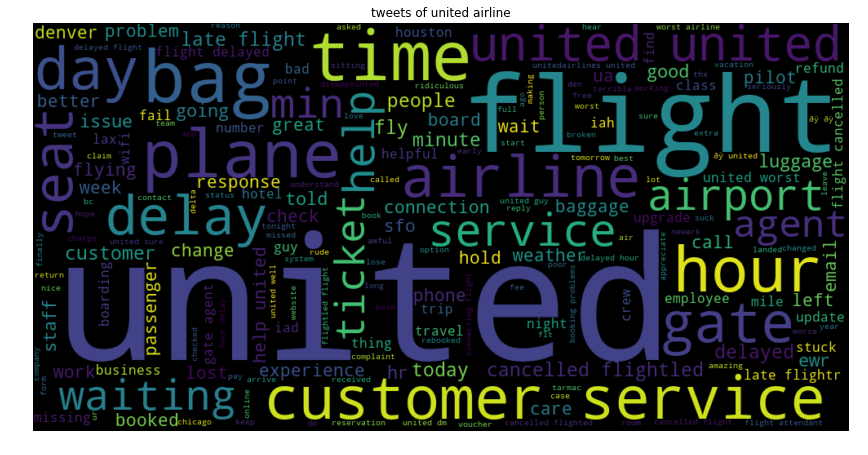

In [63]:
#united airline wordcloud
united_df = tw_new[tw_new['airline companies'] == 'united']
united_list = united_df['text']

text = ' '.join(united_list)
wordcloud5 = WordCloud(width = 1000, height = 500).generate(text)
plt.figure(figsize=(15,7.5))
plt.imshow(wordcloud5, interpolation='bilinear')
plt.title('tweets of united airline')
plt.axis("off")
plt.show()

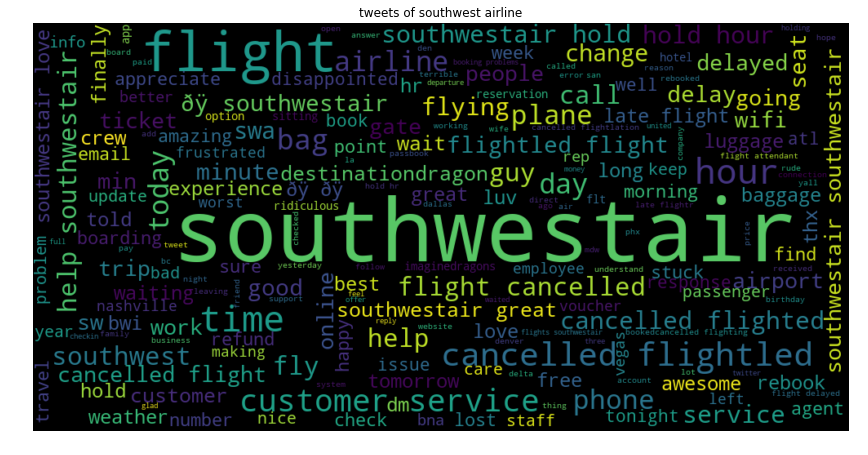

In [64]:
#southwest airline wordcloud
southwestair_df = tw_new[tw_new['airline companies'] == 'southwestair']
southwestair_list = southwestair_df['text']

text = ' '.join(southwestair_list)
wordcloud6 = WordCloud(width = 1000, height = 500).generate(text)
plt.figure(figsize=(15,7.5))
plt.imshow(wordcloud6, interpolation='bilinear')
plt.title('tweets of southwest airline')
plt.axis('off')
plt.show()

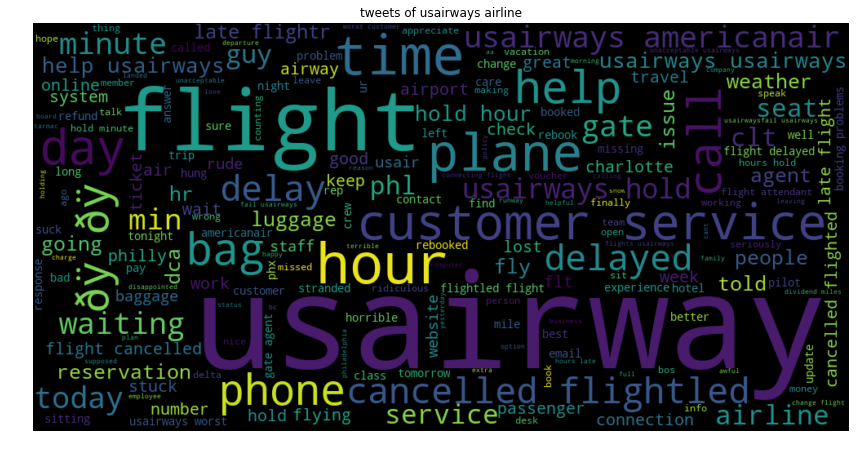

In [65]:
#usairways airline wordcloud
usairways_df = tw_new[tw_new['airline companies'] == 'usairways']
usairways_list = usairways_df['text']

text = ' '.join(usairways_list)
wordcloud7 = WordCloud(width = 1000, height = 500).generate(text)
plt.figure(figsize=(15,7.5))
plt.imshow(wordcloud7, interpolation='bilinear')
plt.title('tweets of usairways airline')
plt.axis('off')
plt.show()

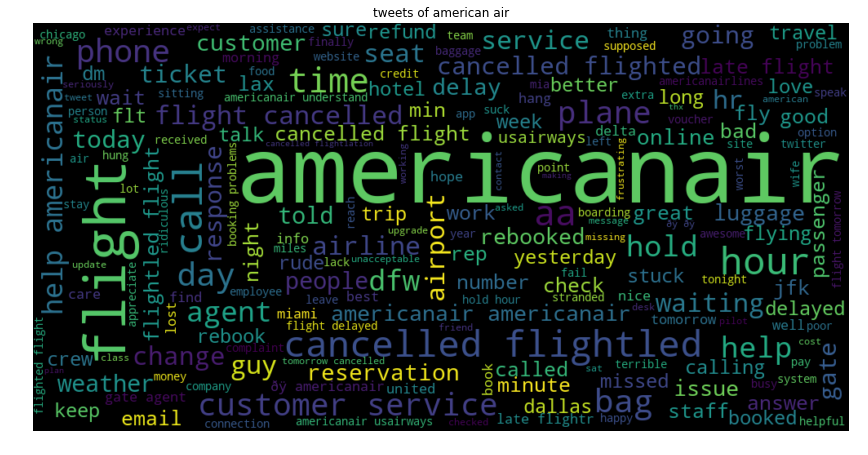

In [66]:
#american airline wordcloud
americanair_df = tw_new[tw_new['airline companies'] == 'americanair']
americanair_list = americanair_df['text']

text = ' '.join(americanair_list)
wordcloud8 = WordCloud(width = 1000, height = 500).generate(text)
plt.figure(figsize=(15,7.5))
plt.imshow(wordcloud8, interpolation='bilinear')
plt.title('tweets of american air')
plt.axis("off")
plt.show()

According to wordcloud for each airline company:
1. There are almost positive words in virgin america airline, that corresponds to the highest satisfaction rate.
2. Less positive words in jet blue than that in virgin america, but in a whole it is fine.
3. There are more obvious negative words, like 'problem', 'waiting', 'cancelled', 'late'
4. Southwest is fine, it has No.3 satisfaction rate.
5. US airways has the worst problem and complaint shown in the wordcloud, that corresponds to the worst satisfaction rate.
6. Cannot see much positive words in american air wordcloud.

In [67]:
prediction_results = pd.DataFrame({'results': df['predicted'] == y_test2_show['negative reason']})
prediction_results.head(10)

,results
0,False
1,False
2,False
3,False
4,True
5,False
6,False
7,True
8,False
9,True


In [68]:
results_df = df[df['predicted'] == y_test2_show['negative reason']] #the correct prediction negative reasons

In [69]:
results_df['predicted'].value_counts()

Customer Service Issue         641
Late Flight                    347
Can't Tell                     201
Cancelled Flight               171
Lost Luggage                   156
Bad Flight                      53
Flight Booking Problems         51
Flight Attendant Complaints     44
longlines                        4
Damaged Luggage                  2
Name: predicted, dtype: int64

In [70]:
print(tw_ordered_new.iloc[624]['text']) #should be longlines, but Flight Attendant Complaints
print(tw_ordered_new.iloc[5046]['text']) #should be Late Flight, but Lost luggage
print(tw_ordered_new.iloc[2164]['text']) #should be Customer Service Issue, but Late flight

united gate iad released passengers board deplaning peopleon bridge flight board
usairways connecting charlotte houston mechanical issue determined checked bags
united installed working kicked hour wasted hours


For model two, the accuracy is nearly 61%, meaning the 61% of all predicted negative reasons are the same as the correct negative reasons. The first ten predicted reasons and the first ten true reasons are shown in Model implementation. It can be found that only three of ten are correct.

In those corrected negative reasons, 'customer service issue' is the reason to be predicted best, while 'damaged luggage' is the reason to be predicted worst. Take three test above, the reason of wrong prediction may be:
1. The tweet has fewer keywords which are including in the toppest common 1000 words.
2. The tweet contain some keywords which is weighed as other reason when trained data in the logistic regression model, then result in misleading the analysis.

To increase the accuracy for both models:
1. Increase the number of keywords from 1000 to more, such as 3000.
2. Combine some negative reasons with similar meanings.
   For example, if the tweet said the flight cancelled because of late flight, it can be classified as a combined reason, given    a new name, not just classify the tweet to late flight or cancelled, that is not completely explained.
3. Tuning hyperparameters.
4. use Cross Validation method in the train/split, it will be applied to more subsets.

# Bonus

### 1.  Neural networking

In [107]:
#alternative method - use the neural networking instead of logistic regression
#the word frequency matrix stays the same
#directly use the whole data in neural networking to apply this model to be applied on the US airline sentiment prediction
from sklearn.neural_network import MLPClassifier
X = np.array(x_train)
Y = np.array(y_train)
clf_alternative = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [108]:
clf_improve = clf_alternative.fit(X, Y)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [109]:
clf_prediction = clf_improve.predict(x_US)
accuracy_new = accuracy_score(y_US,clf_prediction)

In [110]:
accuracy_new

0.79525171129018279

It can be found that the accuracy improves comparing the previous accuracy 53% in logistic regression model. This method is better.

### 2. Display the results of the logistic regression model visually

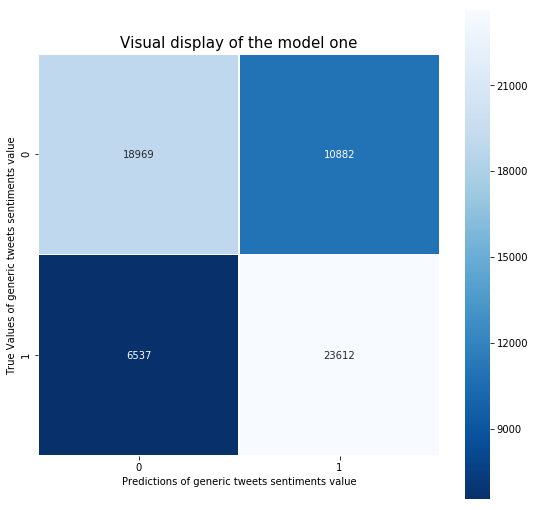

In [86]:
#plot prediction results in each model
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(y_test, prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Blues_r')
plt.ylabel('True Values of generic tweets sentiments value')
plt.xlabel('Predictions of generic tweets sentiments value')
plt.title('Visual display of the model one', size = 15)
plt.show()

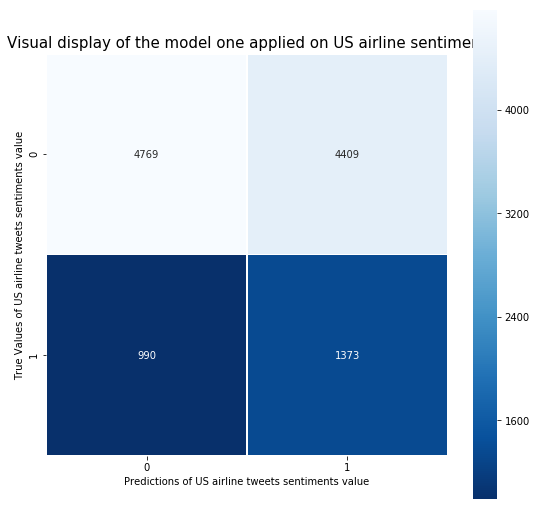

In [95]:
cm2 = metrics.confusion_matrix(y_US, prediction_US)
plt.figure(figsize=(9,9))
sns.heatmap(cm2, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Blues_r')
plt.ylabel('True Values of US airline tweets sentiments value')
plt.xlabel('Predictions of US airline tweets sentiments value')
plt.title('Visual display of the model one applied on US airline sentiment', size = 15)
plt.show()

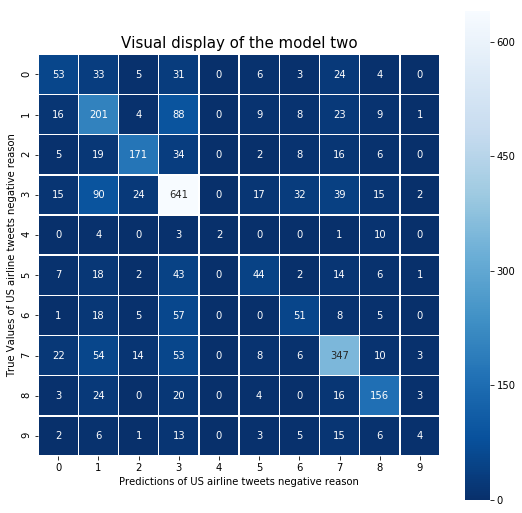

In [90]:
cm3 = metrics.confusion_matrix(y_test2, prediction_new)
plt.figure(figsize=(9,9))
sns.heatmap(cm3, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Blues_r')
plt.ylabel('True Values of US airline tweets negative reason')
plt.xlabel('Predictions of US airline tweets negative reason')
plt.title('Visual display of the model two', size = 15)
plt.show()